In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [54]:
df=pd.read_csv('UberDataset.csv')

In [55]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [57]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [13]:
df.duplicated().sum()

1

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES,1156.0,21.115398,359.299007,0.5,2.9,6.0,10.4,12204.7


In [15]:
df.describe(include='O').T

,count,unique,top,freq
START_DATE,1156,1155,6/28/2016 23:34,2
END_DATE,1155,1154,6/28/2016 23:59,2
CATEGORY,1155,2,Business,1078
START,1155,177,Cary,201
STOP,1155,188,Cary,203
PURPOSE,653,10,Meeting,187


### Findings

- As of now there is only 1 numerical column: "Miles" (Max value: 12,204.7 miles   Min value: 0.5 miles Avg value:21.1 miles)
- 6 object type columns
- Fields such as 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE' have *null values while 'START_DATE' doesn't have any null value

### Data Cleansing

In [58]:
# Then
df.PURPOSE.unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [59]:
def remove(x):
    if type(x)==str:
        x=x.replace(' ($)','')
        return x
    else:
        return x

In [60]:
df.PURPOSE=df.PURPOSE.apply(remove)

In [61]:
# Now
df.PURPOSE.unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices', 'Charity',
       'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [22]:
df.PURPOSE.mode()

0    Meeting
Name: PURPOSE, dtype: object

<AxesSubplot:>

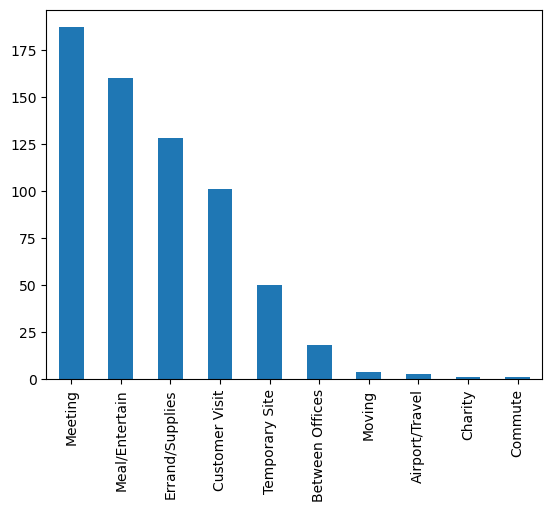

In [28]:
df.PURPOSE.value_counts().plot(kind='bar')

In [31]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [62]:
df[df['END_DATE'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [32]:
df[df['CATEGORY'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [33]:
df[df['START'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [34]:
# We can see this row 1155 doesn't have any information, we can drop the row

In [63]:
df.drop(1155,axis=0,inplace=True)

In [64]:
df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [37]:
df[df['PURPOSE'].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1065,12/19/2016 14:18,12/19/2016 14:32,Business,Unknown Location,Unknown Location,5.3,NaN
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN


In [39]:
## Since 'Meeting' is often in Purpose, I chose to replace null values with Mode of Purpose

In [65]:
df['PURPOSE'].fillna(value="Missing",inplace=True)

In [66]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

#### Checking for duplicates

In [41]:
df.duplicated().sum()

1

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.duplicated().sum()

0

#### Checking for Data Inconsistency

In [67]:
df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [68]:
df['START'].replace(to_replace='R?walpindi',value='Rawalpindi',inplace=True)

In [53]:
df['START'].nunique()

175

In [48]:
df['STOP'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

In [69]:
df['START'].replace(to_replace='Kar?chi',value='Karachi',inplace=True)

In [70]:
df['STOP'].replace(to_replace='R?walpindi',value='Rawalpindi',inplace=True)

In [71]:
df['STOP'].replace(to_replace='Kar?chi',value='Karachi',inplace=True)

In [72]:
df['STOP'].nunique()

186

In [73]:
df['START'].nunique()

175

In [74]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Missing
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Converting Fields into suitable datatype

In [75]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [76]:
df.START_DATE=pd.to_datetime(df['START_DATE'])
df.END_DATE=pd.to_datetime(df['END_DATE'])

In [77]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [78]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [82]:
df['RIDE DURATION']=df['END_DATE']-df['START_DATE']

In [83]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,RIDE DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [88]:
df.drop(columns=['RIDE DURATION (hrs)'],axis=1,inplace=True)

In [85]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### Fields Addition (Date/Time)

In [90]:
df['RIDE DURATION']=(df['END_DATE']-df['START_DATE'])/pd.Timedelta(minutes=1)

In [92]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,RIDE DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [93]:
df.rename(columns={'RIDE DURATION':'RIDE DURATION (min)'},inplace=True)

In [94]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,RIDE DURATION (min)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   START_DATE           1155 non-null   datetime64[ns]
 1   END_DATE             1155 non-null   datetime64[ns]
 2   CATEGORY             1155 non-null   object        
 3   START                1155 non-null   object        
 4   STOP                 1155 non-null   object        
 5   MILES                1155 non-null   float64       
 6   PURPOSE              1155 non-null   object        
 7   RIDE DURATION (min)  1155 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 72.3+ KB


In [96]:
df['start_day']=df['START_DATE'].dt.day_name()

In [98]:
df['end_day']=df['END_DATE'].dt.day_name()

In [101]:
df['Ride Month']=df['START_DATE'].dt.month_name()

In [102]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,RIDE DURATION (min),start_day,end_day,Ride Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0,Saturday,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,Wednesday,January


In [106]:
df.drop(columns=['hour'],axis=1,inplace=True)

In [108]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,RIDE DURATION (min),start_day,end_day,Ride Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0,Saturday,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,Wednesday,January


In [109]:
def working_shift(h):
    if 5<=h<12:
        return "Morning"
    elif 12<=h<17:
        return "Afternoon"
    elif 17<=h<20:
        return "Evening"
    else:
        return "Night"

In [110]:
df['Working Shift']=df['START_DATE'].dt.hour.apply(working_shift)

In [111]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,RIDE DURATION (min),start_day,end_day,Ride Month,Working Shift
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,Friday,January,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0,Saturday,Saturday,January,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,Saturday,January,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,Tuesday,January,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,Wednesday,January,Afternoon


#### Renaming columns

In [112]:
df.rename(columns={'CATEGORY':'Category','START':'Start Destination','STOP':'Stop Destination','MILES':'Miles covered','PURPOSE':'Travel Purpose'},inplace=True)

In [113]:
df.head()

,START_DATE,END_DATE,Category,Start Destination,Stop Destination,Miles covered,Travel Purpose,RIDE DURATION (min),start_day,end_day,Ride Month,Working Shift
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,Friday,January,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0,Saturday,Saturday,January,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,Saturday,January,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,Tuesday,January,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,Wednesday,January,Afternoon


In [114]:
df.drop(columns=['START_DATE','END_DATE'],axis=1,inplace=True)

In [115]:
df.head()

,Category,Start Destination,Stop Destination,Miles covered,Travel Purpose,RIDE DURATION (min),start_day,end_day,Ride Month,Working Shift
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,Friday,January,Night
1,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0,Saturday,Saturday,January,Night
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,Saturday,January,Night
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,Tuesday,January,Evening
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,Wednesday,January,Afternoon


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             1155 non-null   object 
 1   Start Destination    1155 non-null   object 
 2   Stop Destination     1155 non-null   object 
 3   Miles covered        1155 non-null   float64
 4   Travel Purpose       1155 non-null   object 
 5   RIDE DURATION (min)  1155 non-null   float64
 6   start_day            1155 non-null   object 
 7   end_day              1155 non-null   object 
 8   Ride Month           1155 non-null   object 
 9   Working Shift        1155 non-null   object 
dtypes: float64(2), object(8)
memory usage: 90.4+ KB


### Data Visualization

In [121]:
df['Working Shift'].unique()

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [130]:
df.groupby(by=['Working Shift'])['Miles covered'].sum().sort_values(ascending=False)

Working Shift
Afternoon    5387.8
Night        2452.0
Evening      2329.4
Morning      2035.5
Name: Miles covered, dtype: float64

<AxesSubplot:xlabel='Working Shift'>

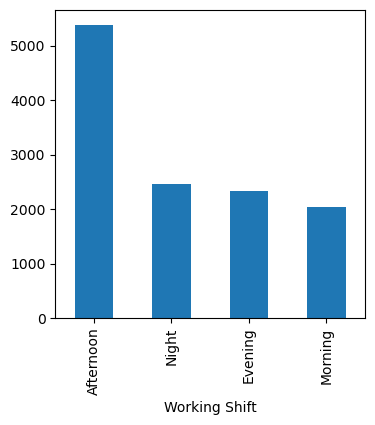

In [129]:
plt.figure(figsize=(4,4))
df.groupby(by=['Working Shift'])['Miles covered'].sum().sort_values(ascending=False).plot(kind='bar')

#### Findings:
- Uber Drivers gets rides mostly in Afternoon shift (12pm to 5pm) and least rides in Morning Shift (5am to 12pm)

In [131]:
df.head()

,Category,Start Destination,Stop Destination,Miles covered,Travel Purpose,RIDE DURATION (min),start_day,end_day,Ride Month,Working Shift
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,Friday,January,Night
1,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0,Saturday,Saturday,January,Night
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,Saturday,January,Night
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,Tuesday,January,Evening
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,Wednesday,January,Afternoon


In [134]:
df.groupby(by='start_day')['Miles covered'].sum().sort_values(ascending=False)

start_day
Friday       2595.0
Saturday     1976.3
Thursday     1818.0
Sunday       1696.4
Tuesday      1481.7
Monday       1387.4
Wednesday    1249.9
Name: Miles covered, dtype: float64

In [138]:
df.groupby(by='start_day')['Miles covered'].mean().sort_values(ascending=False)

start_day
Saturday     13.175333
Friday       12.597087
Thursday     11.805195
Sunday       11.462162
Wednesday     8.502721
Tuesday       8.418750
Monday        7.973563
Name: Miles covered, dtype: float64

#### Findings

- Uber drivers drives most number of miles in 'Friday' and least number of miles in 'Wednesday'
- Uber drivers on an average drives 9 to 12 km everyday

<AxesSubplot:xlabel='Count', ylabel='Travel Purpose'>

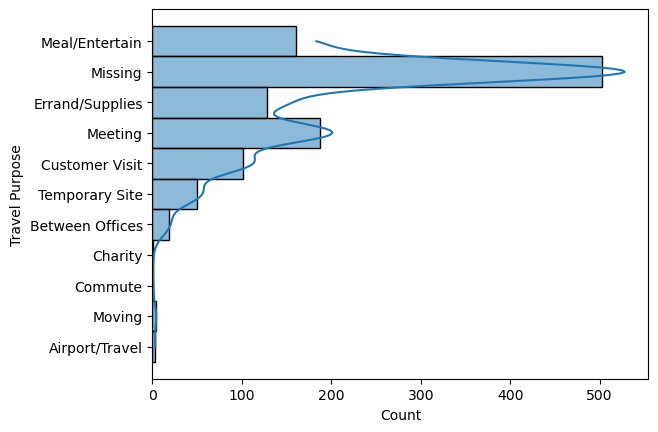

In [144]:
sns.histplot(data=df,y='Travel Purpose',kde=True)

<AxesSubplot:xlabel='start_day', ylabel='Count'>

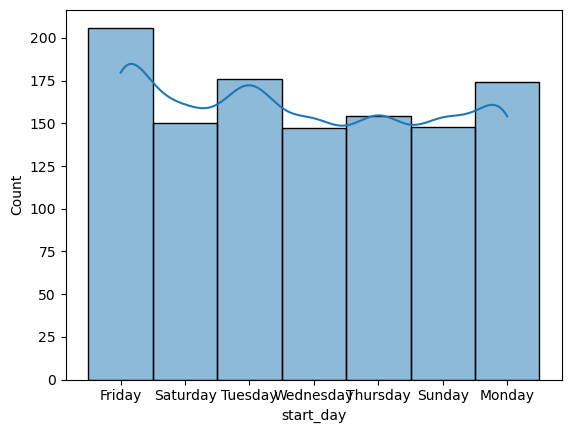

In [141]:
sns.histplot(data=df,x='start_day',kde=True)

<AxesSubplot:xlabel='Count', ylabel='Category'>

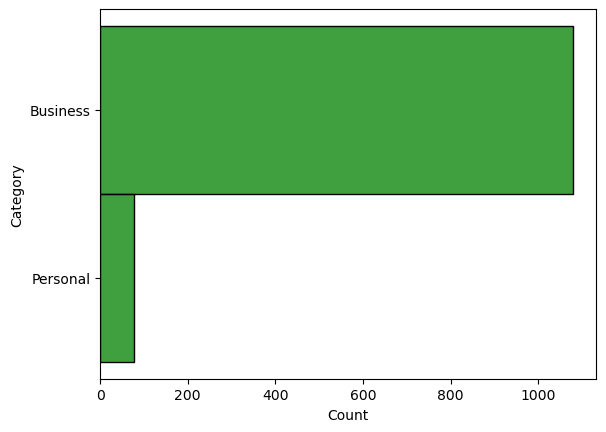

In [146]:
sns.histplot(data=df,y='Category',color='green')

#### Findings:
- Most rides were taken on Friday
- Most uber passengers don't like to share the purpose of ride
- Among those passengers who shared purpose of Travel, Meeting and Meal/Entertain were highest
- Most of the Uber rides came from business category

In [145]:
df.head()

,Category,Start Destination,Stop Destination,Miles covered,Travel Purpose,RIDE DURATION (min),start_day,end_day,Ride Month,Working Shift
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Friday,Friday,January,Night
1,Business,Fort Pierce,Fort Pierce,5.0,Missing,12.0,Saturday,Saturday,January,Night
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Saturday,Saturday,January,Night
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Tuesday,Tuesday,January,Evening
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,Wednesday,Wednesday,January,Afternoon
